In [12]:
import pandas as pd
df = pd.read_csv('smoking.csv')
sampled_df = df[:50000]

In [13]:
original_counts = df['smoking'].value_counts()
print("Counts nel dataset originale:\n", original_counts)

sampled_counts = sampled_df['smoking'].value_counts()
print("\nCounts nel dataset partizionato:\n", sampled_counts)

Counts nel dataset originale:
 smoking
0    35237
1    20455
Name: count, dtype: int64

Counts nel dataset partizionato:
 smoking
0    31671
1    18329
Name: count, dtype: int64


In [14]:
sampled_df = sampled_df.drop(['ID','height(cm)','oral'], axis=1)
sampled_df['tartar'] = sampled_df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
sampled_df['gender'] = sampled_df['gender'].apply(lambda x: 1 if x == 'M' else 0)
variabili = list(sampled_df.columns[:-1])

In [15]:
variabili_discrete = ['gender', 'hearing(left)', 'hearing(right)', 'dental caries', 'tartar']

variabili_continue = ['age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

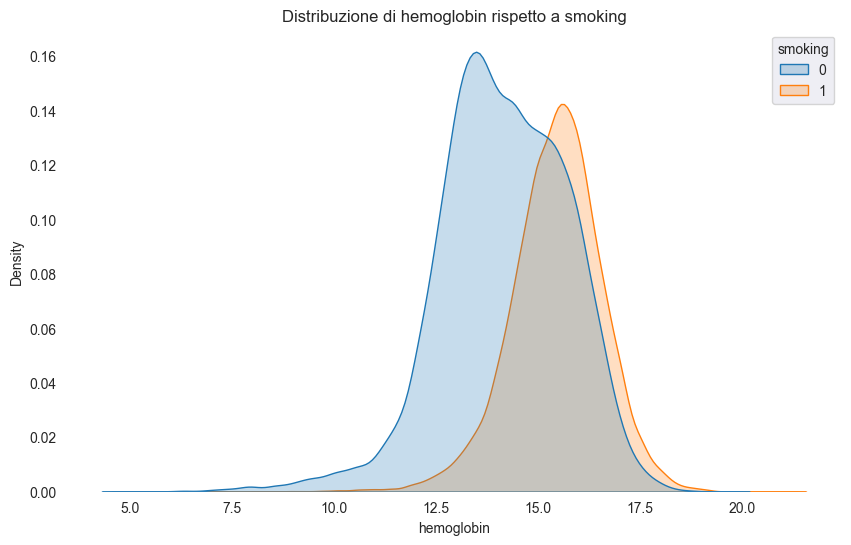

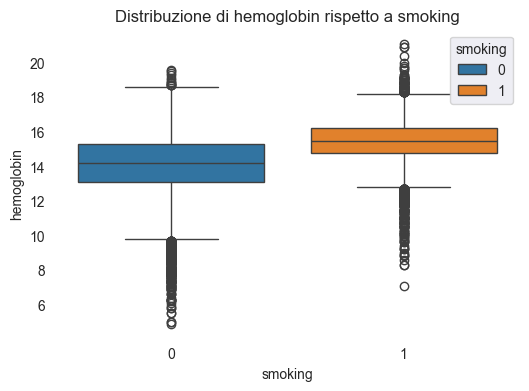

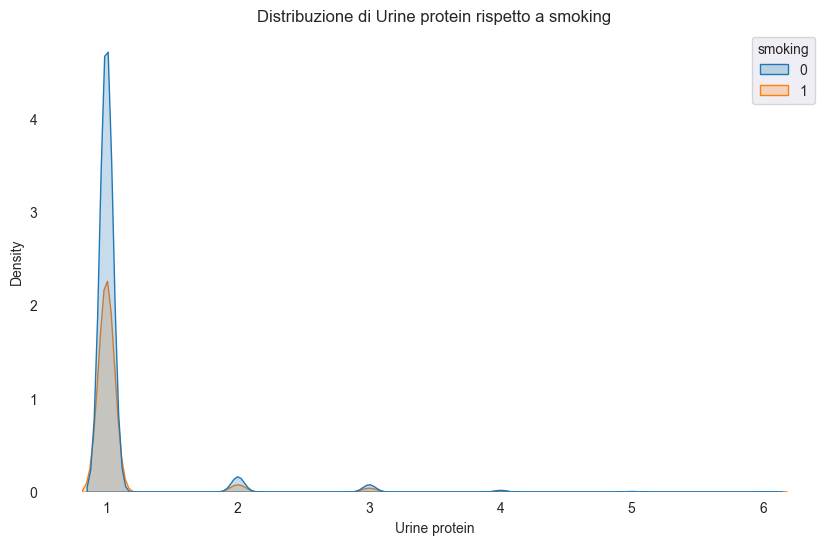

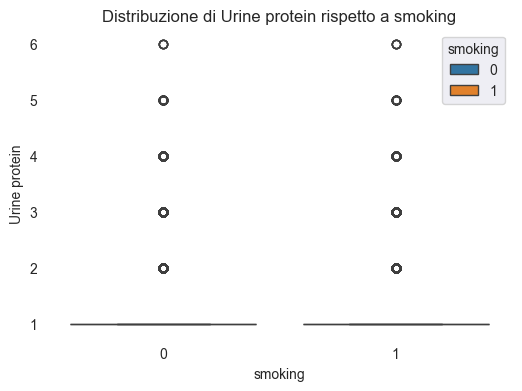

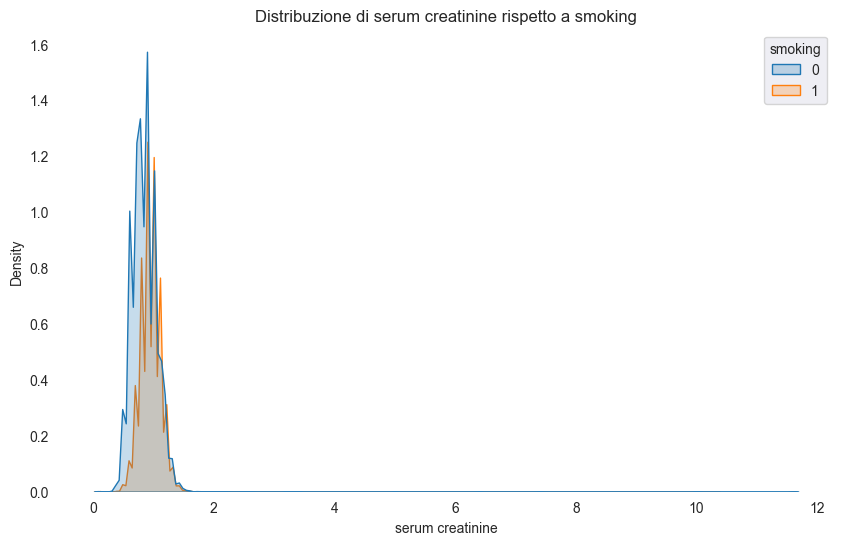

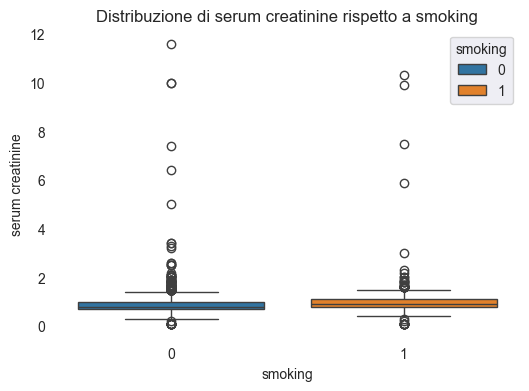

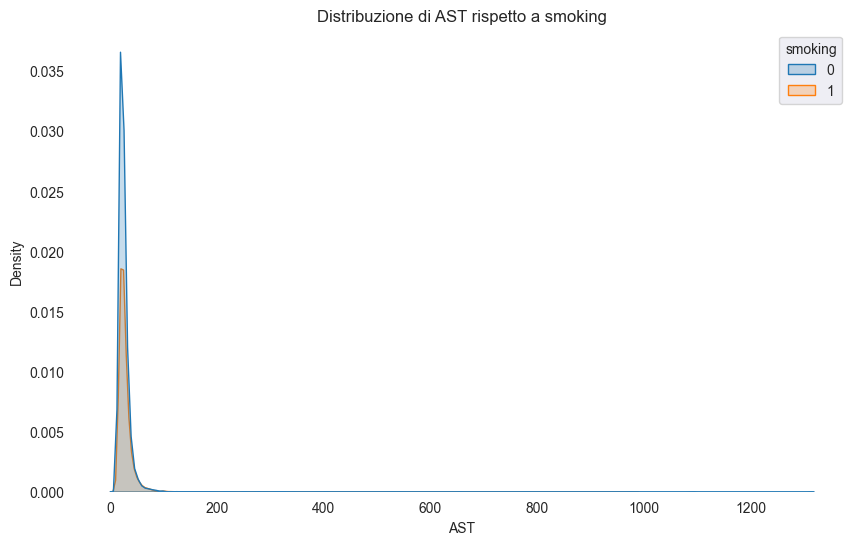

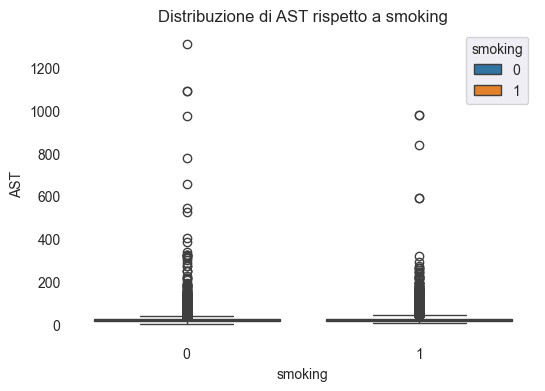

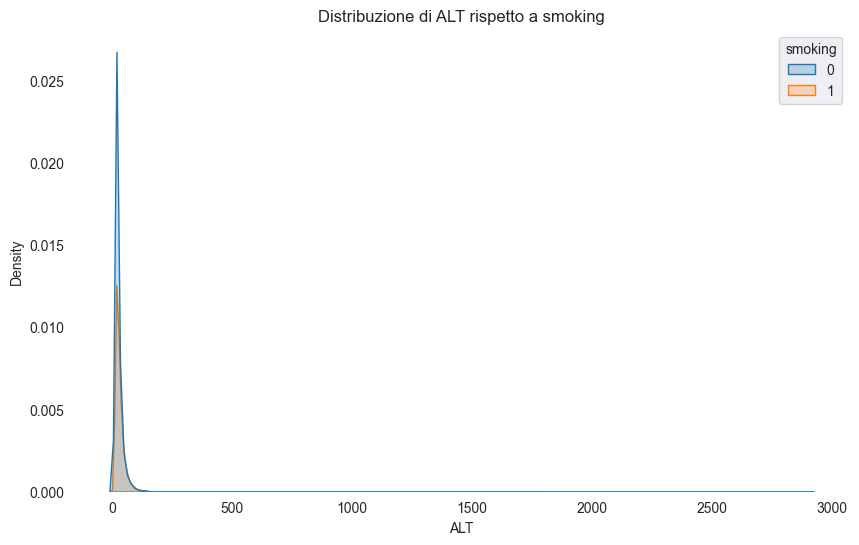

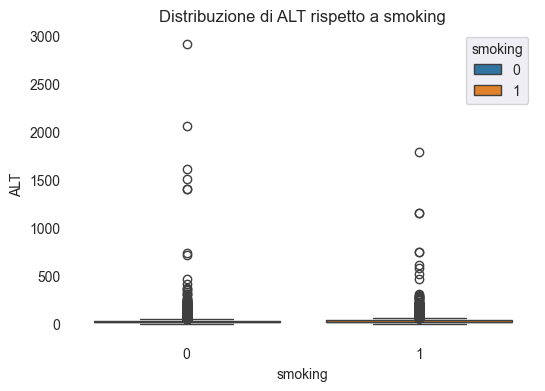

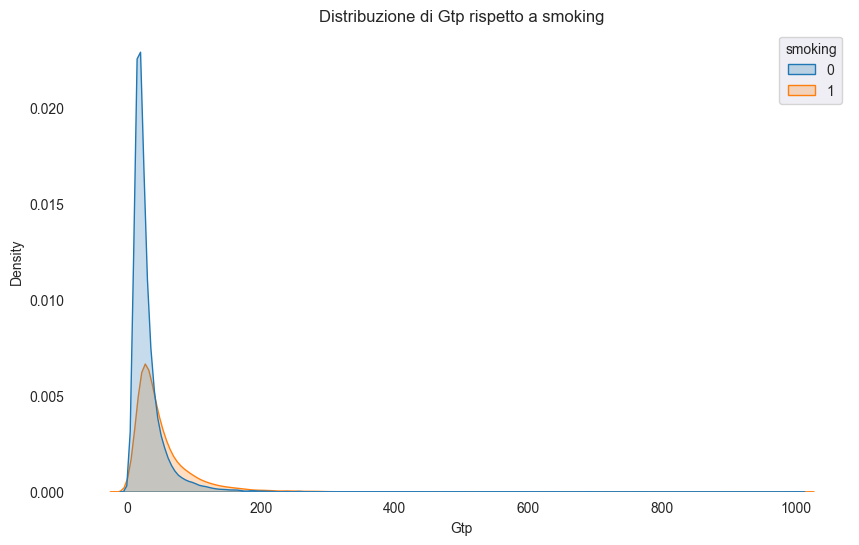

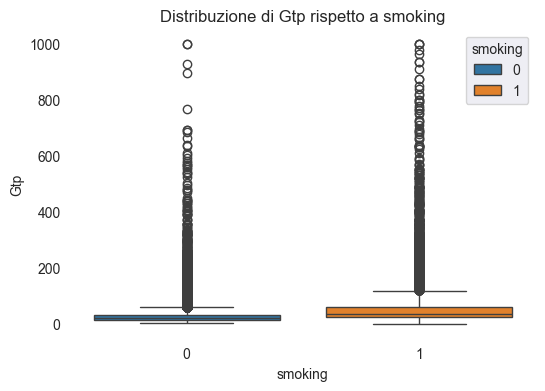

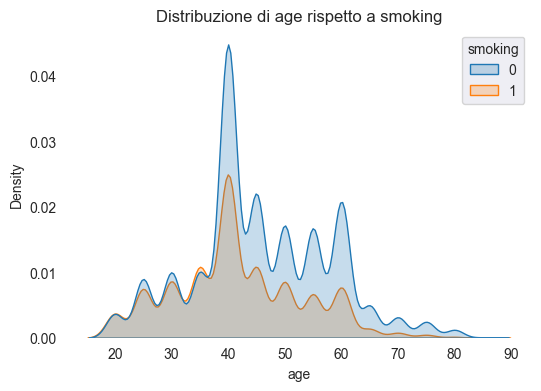

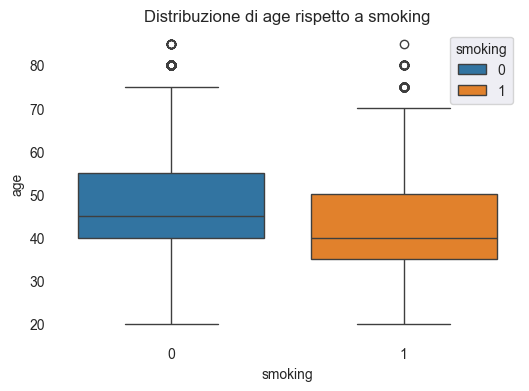

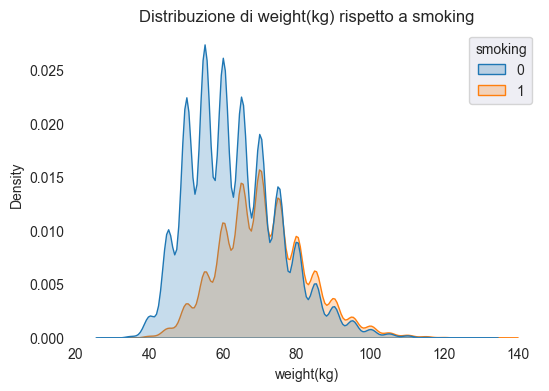

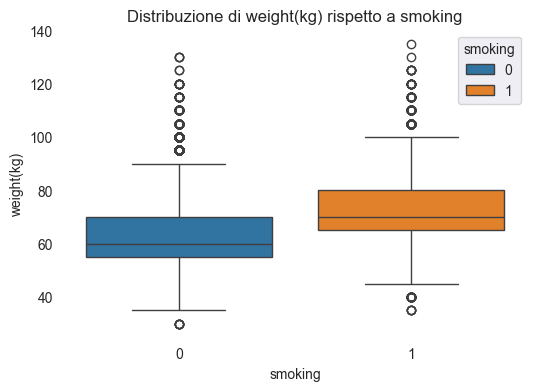

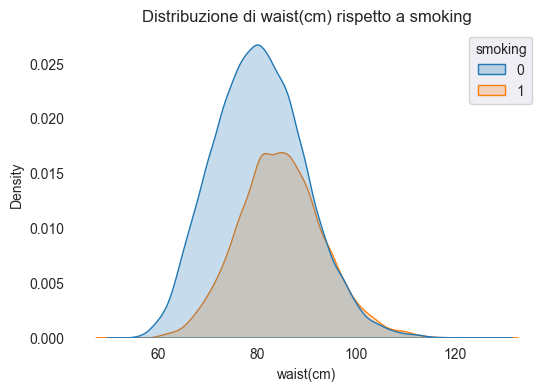

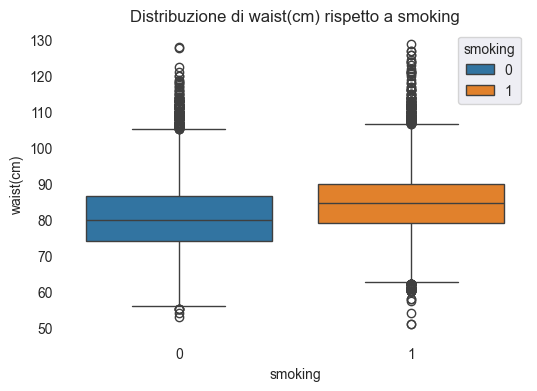

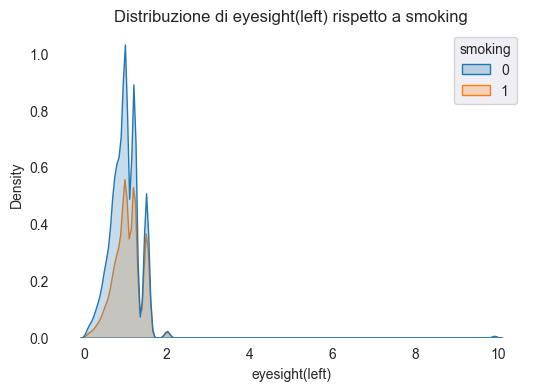

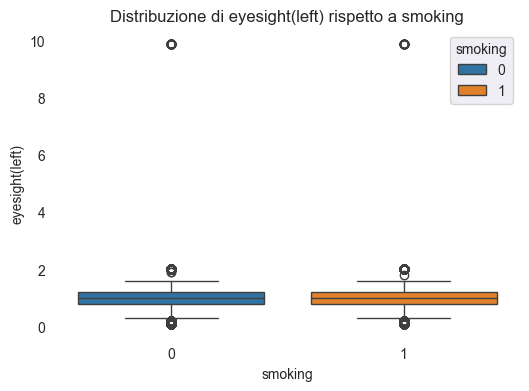

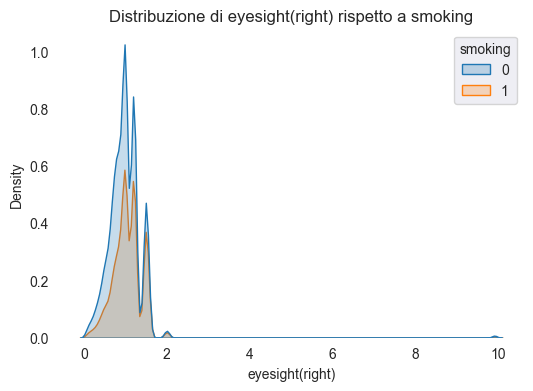

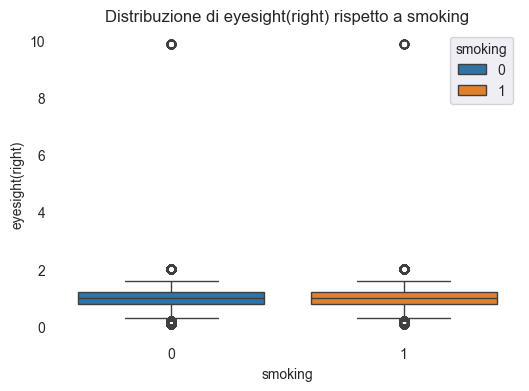

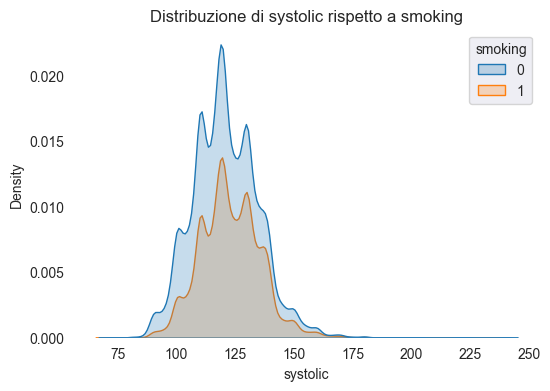

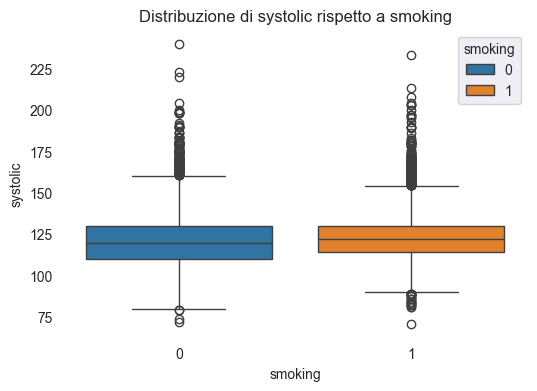

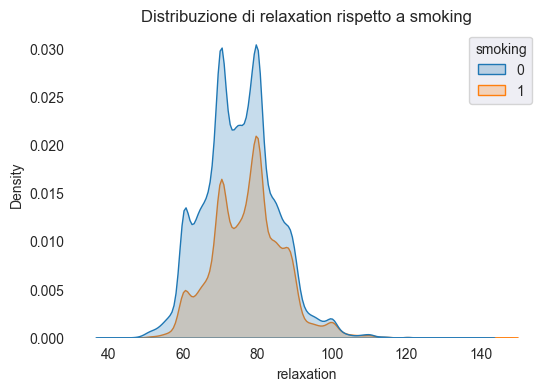

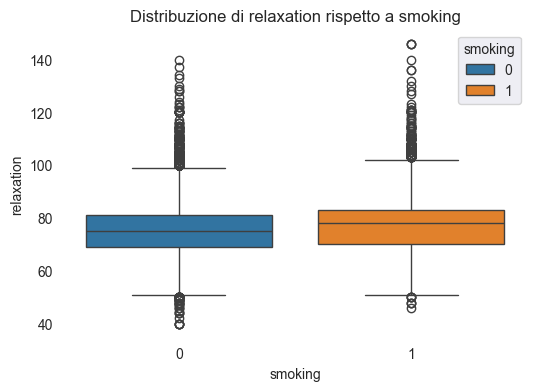

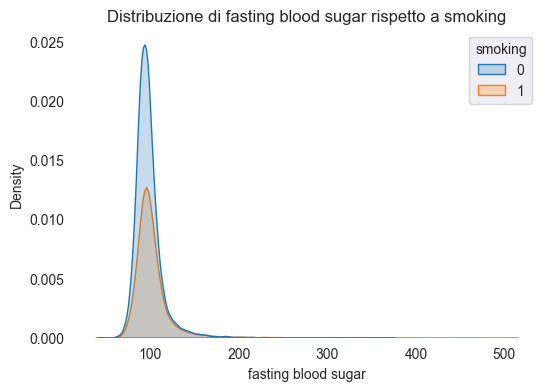

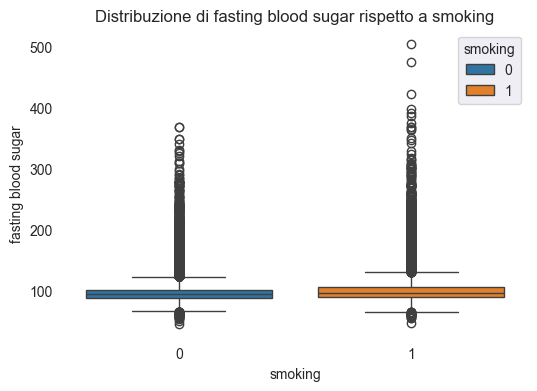

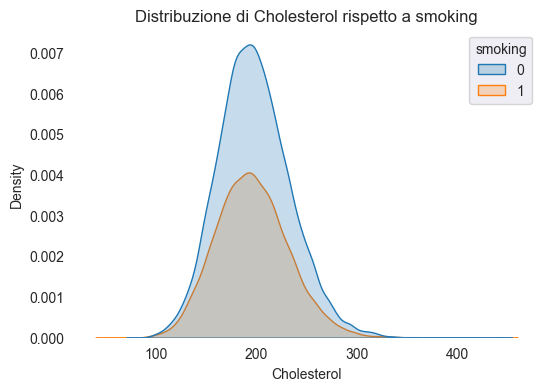

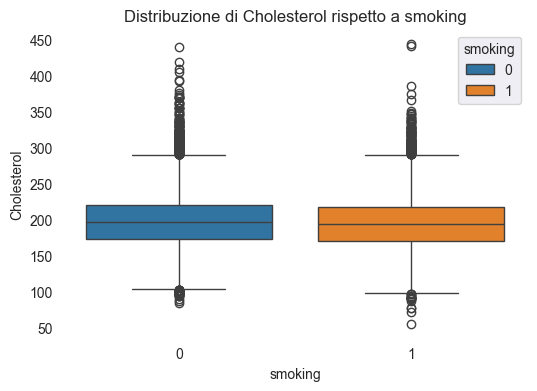

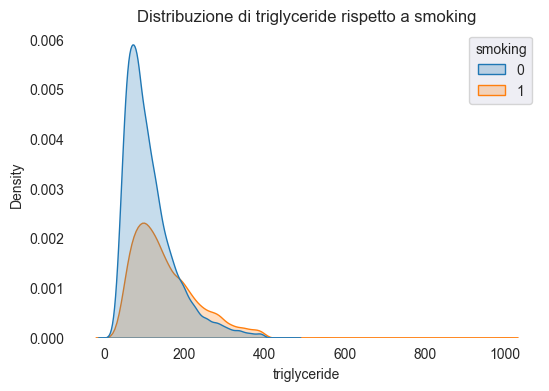

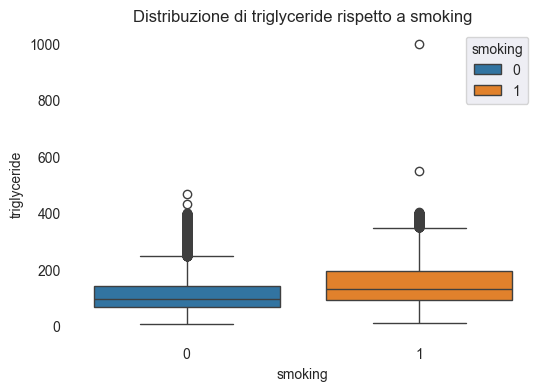

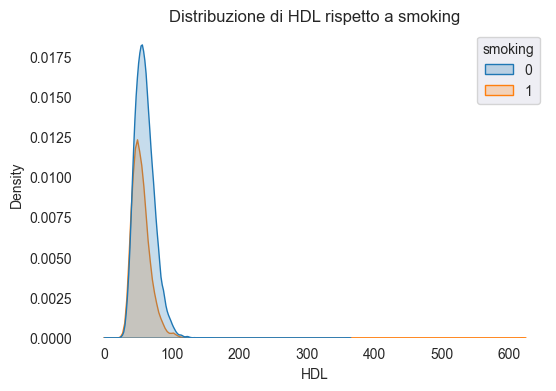

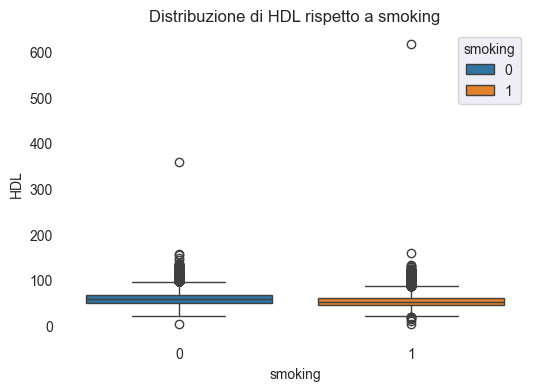

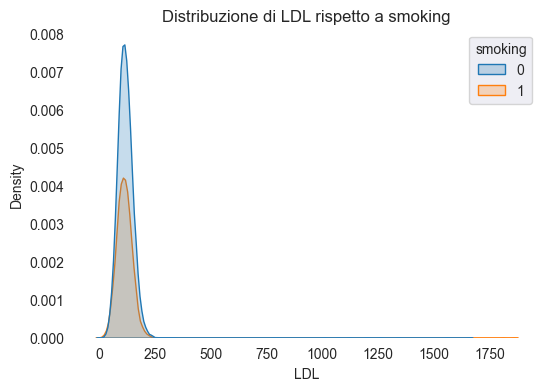

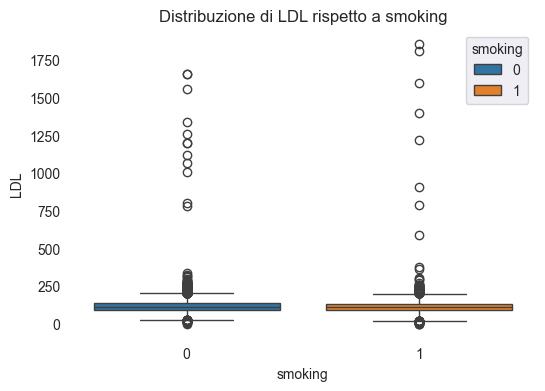

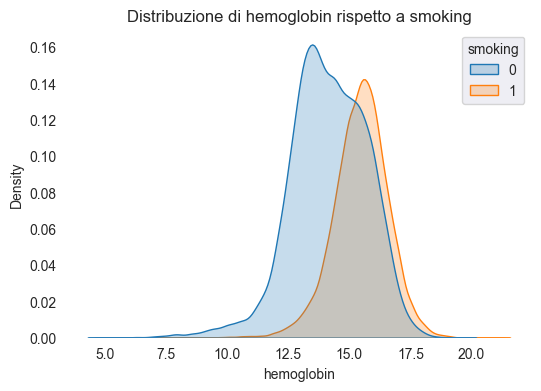

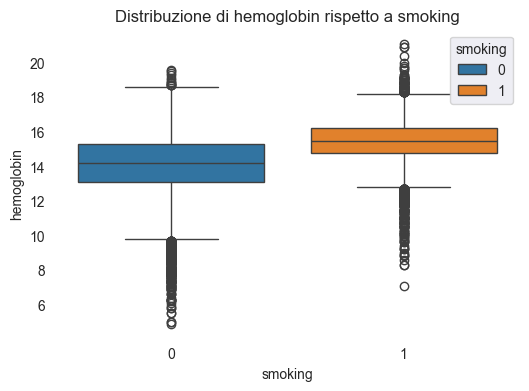

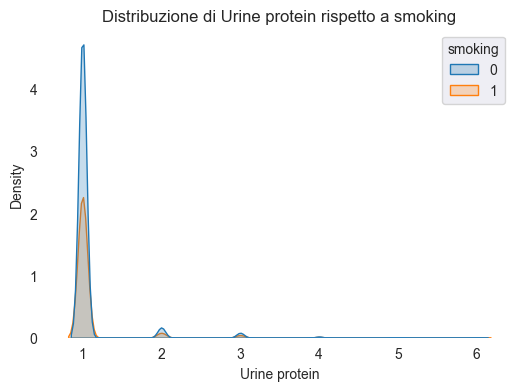

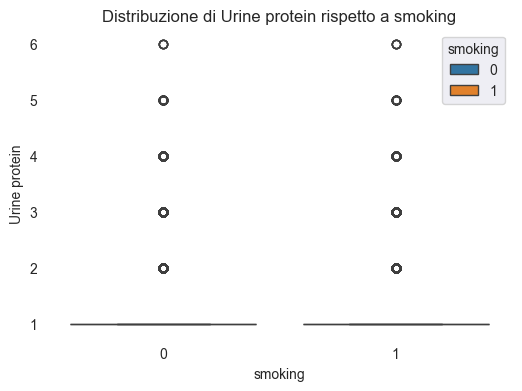

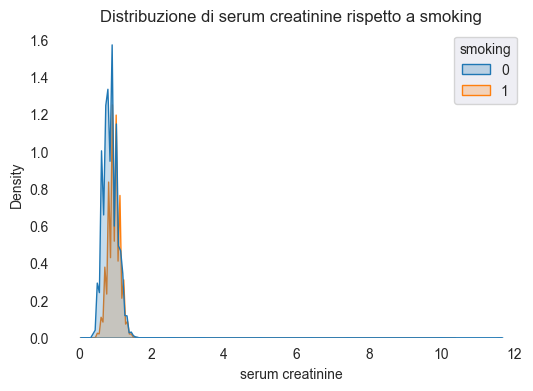

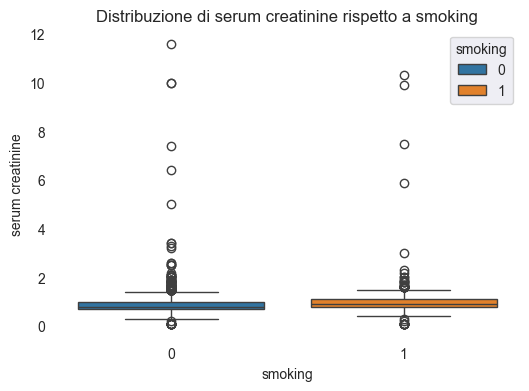

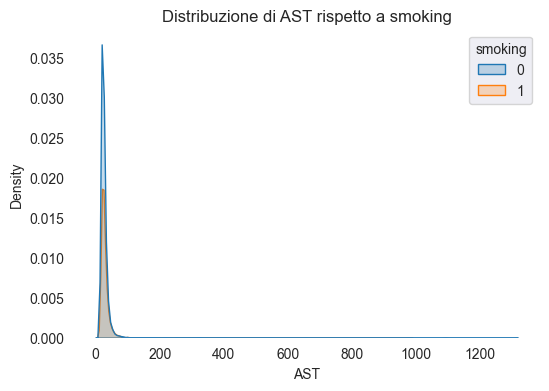

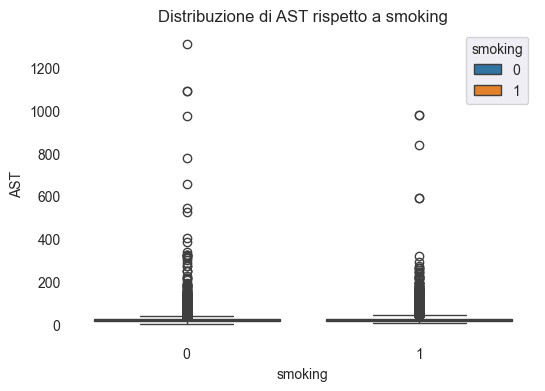

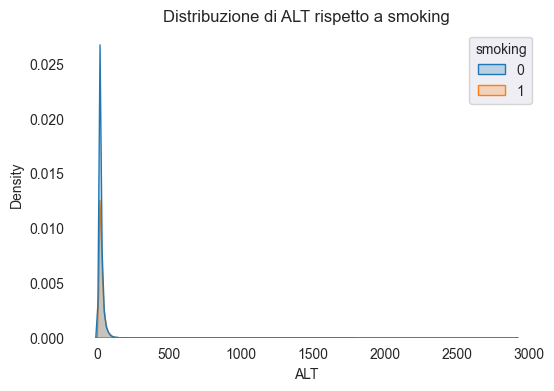

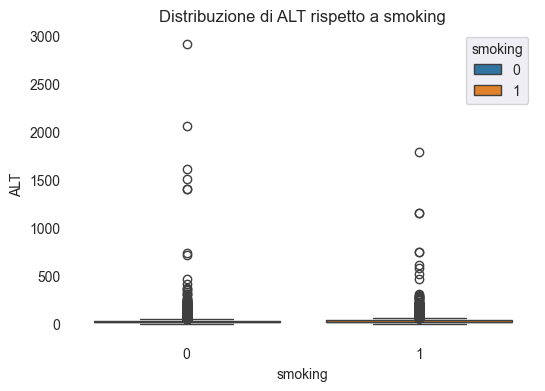

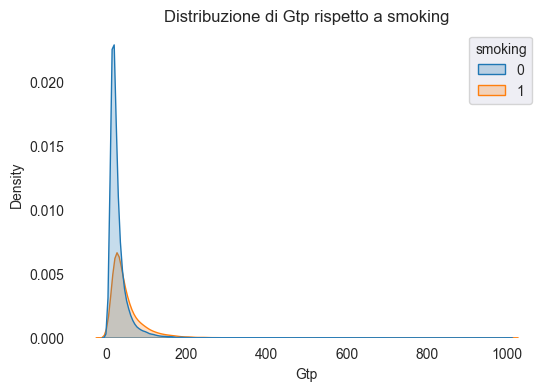

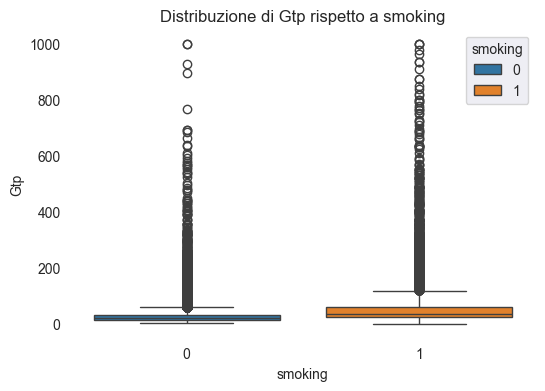

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for colonna in variabili_continue:
    plt.figure(figsize=(6, 4))

    # Imposta lo sfondo bianco
    ax = plt.gca()
    ax.set_facecolor('white')

    # Aggiungi la griglia
    ax.grid(True, linestyle='--', alpha=0.7)


    sns.kdeplot(data=sampled_df, x=colonna, hue='smoking', fill=True)
    plt.title(f'Distribuzione di {colonna} rispetto a smoking')
    plt.show()

    plt.figure(figsize=(6, 4))

    # Set white background
    ax = plt.gca()
    ax.set_facecolor('white')

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

    sns.boxplot(data=sampled_df, x='smoking', y=colonna, hue='smoking')
    plt.title(f'Distribuzione di {colonna} rispetto a smoking')
    plt.show()

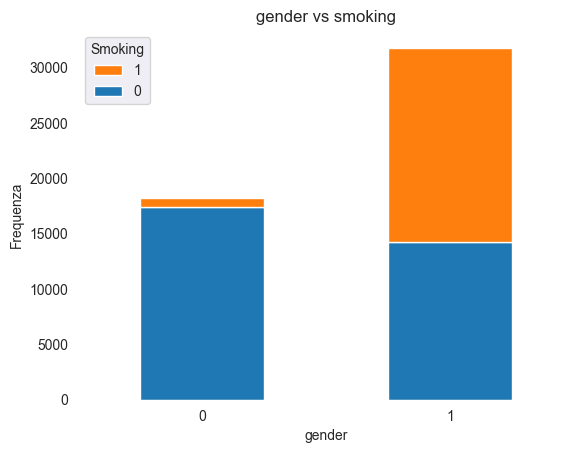

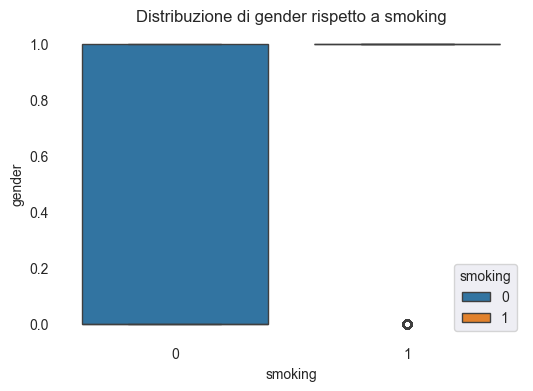

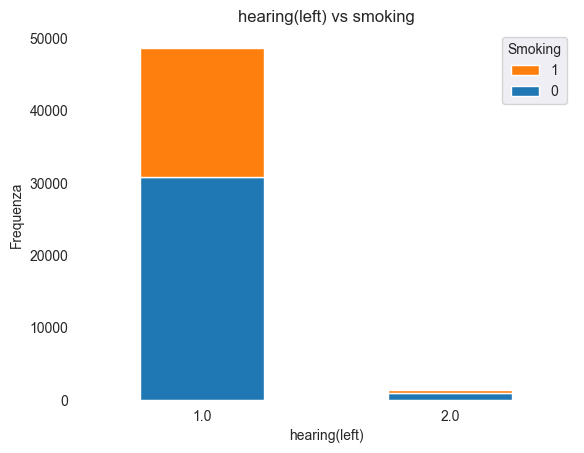

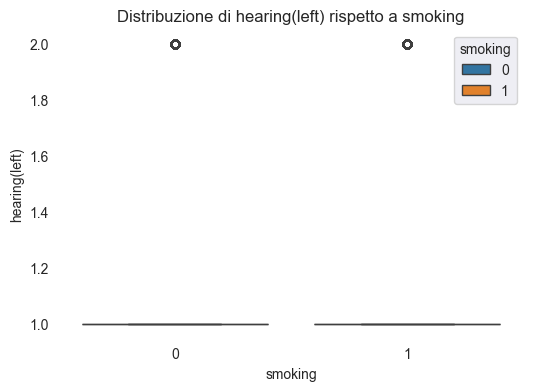

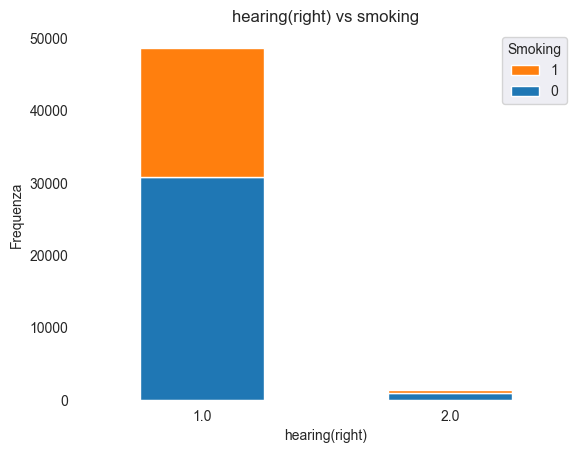

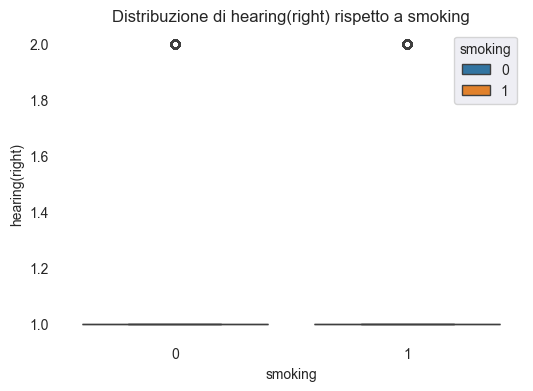

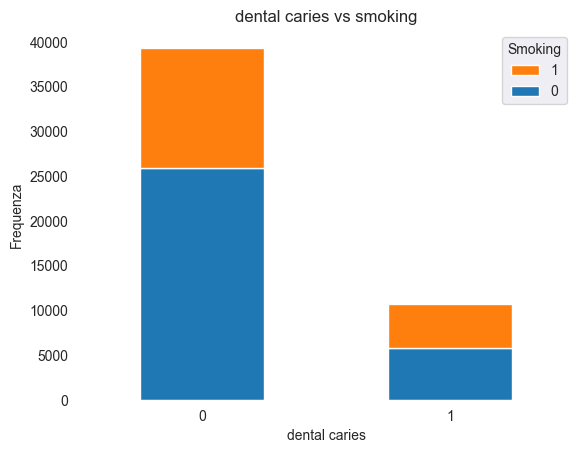

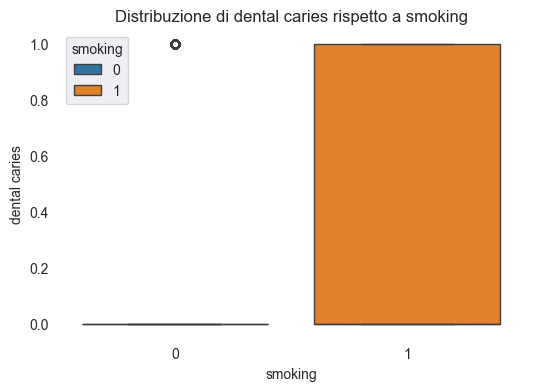

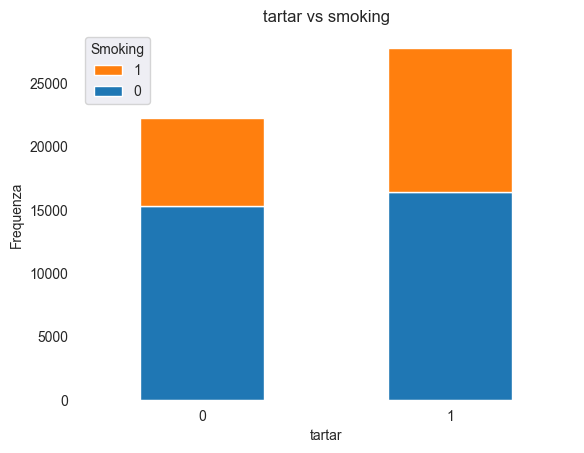

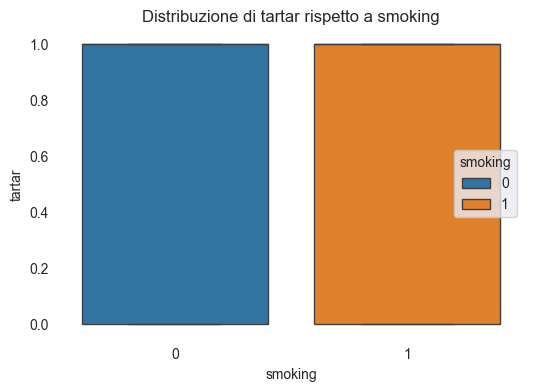

In [22]:
for variabile in variabili_discrete:
    grouped = sampled_df.groupby([variabile, 'smoking']).size().unstack()

    # Creiamo il grafico a barre stackato
    ax = grouped.plot(kind='bar', stacked=True)

    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', alpha=0.7)

    ax.set_title(f'{variabile} vs smoking')
    ax.set_xlabel(f'{variabile}')
    ax.set_ylabel('Frequenza')

    # Rotazione delle labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Aggiungiamo una legenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Smoking')

    plt.show()

In [ ]:
# Calcolare la matrice di correlazione
correlation_matrix = sampled_df.corr()

# Creare una heatmap utilizzando seaborn
sns.set(style="white")  # Impostare uno stile per il background
plt.figure(figsize=(20, 20))  # Impostare le dimensioni della figura

# Creare la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Visualizzare la heatmap
plt.show()

In [ ]:
#forte correlazione positiva tra gender, weight, waist, triglyceride, hemoglobin, serum creatinine, gtp e la variabile target
#forte correlazione negativa tra hdl e variabile target

In [ ]:
# tra gender e target si vede dagli istogrammi che ci sono più uomini che fumano rispetto alle donne questo implica che c'è forte correlazione positiva tra il peso e waist (uomini generlamente pesano di più) si potrebbe fare un discorso simile anche per la creatinina in quando gli uomini hanno generalemnte massa muscolare maggiore e questo implica dei valori di creatinina maggiore (però questa è anche legata a problemi ai reni che possono essere dovuti al fumo)
# la correlazione negativa ha senso, più diminuisce hdl (colesterolo buono) più aumenta il target (quindi che l'individuo fuma)